In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia\Desktop\Machine_Learning\Korona wyzwaä\Challenge 3

27.03.2020  13:46    <DIR>          .
27.03.2020  13:46    <DIR>          ..
27.03.2020  13:42    <DIR>          .ipynb_checkpoints
27.03.2020  13:45    <DIR>          Data
27.03.2020  13:35            10˙701 Day2.ipynb
27.03.2020  13:46               573 Day3.ipynb
               2 File(s)         11˙274 bytes
               4 Dir(s)  24˙910˙729˙216 bytes free


In [3]:
cd Data

C:\Users\benia\Desktop\Machine_Learning\Korona wyzwań\Challenge 3\Data


In [9]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia\Desktop\Machine_Learning\Korona wyzwaä\Challenge 3\Data

27.03.2020  13:45    <DIR>          .
27.03.2020  13:45    <DIR>          ..
27.03.2020  12:05    <DIR>          .vscode
27.03.2020  13:49           416˙339 driving_log.csv
27.03.2020  13:49    <DIR>          IMG
27.03.2020  12:31         5˙605˙904 model.h5
               2 File(s)      6˙022˙243 bytes
               4 Dir(s)  24˙865˙939˙456 bytes free


In [10]:
df = pd.read_csv("driving_log.csv", 
                 names=["center","left","right","steering_angle","throttle","break","speed"])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,0.0,0.0,0,1.087876e-05
1,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,0.0,0.0,0,4.203212e-07
2,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,0.0,0.0,0,1.277449e-05
3,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,0.0,0.0,0,9.042789e-07
4,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,C:\Users\benia\Desktop\Machine_Learning\Korona...,0.0,0.0,0,2.222413e-05


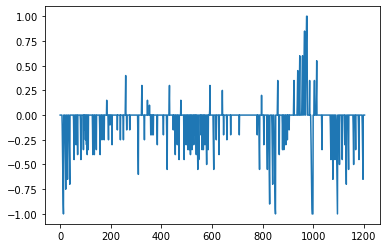

In [11]:
df["steering_angle"].plot()

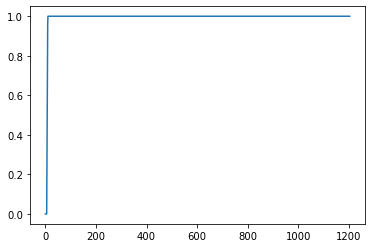

In [12]:
df["throttle"].plot()

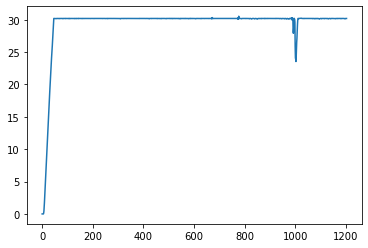

In [13]:
df["speed"].plot()

In [17]:
img = Image.open(df["center"][0])

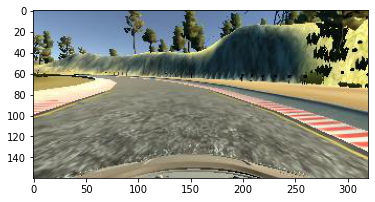

In [18]:
plt.imshow(img)

In [22]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [25]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def procces_image(img):
    return img[10:130:2,::4,:]

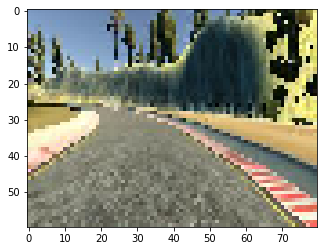

In [26]:
img = procces_image(loadImage(df["center"][0]))
plt.imshow(img)

In [29]:
X=[procces_image(loadImage(fname)) for fname in df["center"]]
X+=[procces_image(loadImage(fname)) for fname in df["left"]]
X+=[procces_image(loadImage(fname)) for fname in df["right"]]
y=np.array(df["steering_angle"])
y= np.concatenate([y,y+0.4,y-0.4])

In [30]:
X = np.array(X)
print(X.shape)
print(y.shape)

(3612, 60, 80, 3)
(3612,)


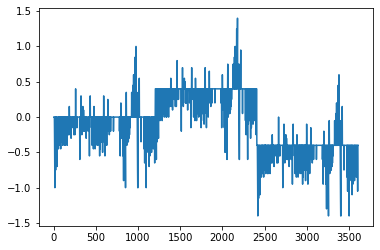

In [31]:
plt.plot(y)
plt.show();

In [32]:
np.save("X.npy",X)
np.save("y.npy",y)